## 기본 라이브러리 불러오기

In [205]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

pd.set_option('display.max_column', None)

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

## 기본 데이터 불러오기

### 서울특별시 공공자전거 대여이력 정보

In [4]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2023 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2023_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 12.764955282211304


In [5]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)']
df_BikeRent_2024 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2024_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 6.063236236572266


### 23년,24년 데이터 합치기

In [10]:
df_BikeRent = pd.concat([df_BikeRent_2023, df_BikeRent_2024], axis=0)

In [11]:
print(f'df_BikeRent_2023.shape[0] : {df_BikeRent_2023.shape[0]}')
print(f'df_BikeRent_2024.shape[0] : {df_BikeRent_2024.shape[0]}')
print(f'df_BikeRent.shape[0] : {df_BikeRent.shape[0]}')

df_BikeRent_2023.shape[0] : 45363848
df_BikeRent_2024.shape[0] : 21621807
df_BikeRent.shape[0] : 66985655


In [14]:
df_BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66985655 entries, 0 to 22107539
Data columns (total 7 columns):
 #   Column   Dtype          
---  ------   -----          
 0   자전거번호    object         
 1   대여일자     object         
 2   대여시간차    timedelta64[ns]
 3   대여대여소번호  object         
 4   반납대여소번호  object         
 5   이용시간(분)  int64          
 6   이용거리(M)  float64        
dtypes: float64(1), int64(1), object(4), timedelta64[ns](1)
memory usage: 4.0+ GB


In [16]:
df_BikeRent.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
0,SPB-39194,2023-01-01,0 days 00:00:30,01554,01554,0,0.0
1,SPB-43457,2023-01-01,0 days 00:02:08,01653,04003,2,0.0


---
### df_BikeRent 의 데이터를 조건에 재조회
- 대여시간차가 5분 미만인 데이터
- 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터

In [19]:
# 대여일자를 날짜 형식으로 변환
df_BikeRent['대여일자'] = pd.to_datetime(df_BikeRent['대여일자'])

In [20]:
# 2023.09.01 ~ 2024.06.30
# 이상패턴 횟수 - 조회용
df_BikeRent230901_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2023-09-01', '2024-06-30')]
# 2024.01.01 ~ 2024.06.30
# 정상 자전거번호 확인용
df_BikeRent240101_240630 = df_BikeRent[df_BikeRent['대여일자'].between('2024-01-01', '2024-06-30')]

In [23]:
print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_BikeRent240101_240630.shape[0] : {df_BikeRent240101_240630.shape[0]}')

df_BikeRent230901_240630.shape[0] : 37176899
df_BikeRent240101_240630.shape[0] : 21621807


---
### 서울시 공공자전거 고장신고 내역

In [26]:
start_time = time.time()
df_BikeBroken = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울시 공공자전거 고장신고 내역_15-24.06.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.4765892028808594


In [28]:
df_BikeBroken.head(3)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33
2,SPB-00035,기타,2015-12-09,17:07:00


In [30]:
df_BikeBroken.shape[0]

767715

---
### 2024년 고장이력만 조회
- 등록일자 : 2024-01-01 ~ 2024-06-30

In [33]:
df_BikeBroken2 = df_BikeBroken[df_BikeBroken['등록일자'].between('2024-01-01', '2024-12-31')]

In [35]:
print(f'df_BikeBroken.shape[0] {df_BikeBroken.shape[0]}')
print(f'df_BikeBroken2.shape[0] {df_BikeBroken2.shape[0]}')

df_BikeBroken.shape[0] 767715
df_BikeBroken2.shape[0] 76463


In [37]:
df_BikeBroken2['자전거번호'].unique()

<StringArray>
['SPB-40704', 'SPB-65171', 'SPB-44316', 'SPB-31539', 'SPB-51998', 'SPB-38568',
 'SPB-68235', 'SPB-44078', 'SPB-66158', 'SPB-45102',
 ...
 'SPB-64200', 'SPB-42922', 'SPB-69655', 'SPB-39650', 'SPB-38653', 'SPB-62989',
 'SPB-31854', 'SPB-62325', 'SPB-62654', 'SPB-35527']
Length: 28589, dtype: string

In [39]:
df_BikeBroken2['자전거번호'].value_counts()

자전거번호
SPB-30296    24
SPB-70298    23
SPB-31172    21
SPB-41406    21
SPB-33626    19
             ..
SPB-60257     1
SPB-40210     1
SPB-59161     1
SPB-32403     1
SPB-35527     1
Name: count, Length: 28589, dtype: Int64

In [41]:
# 2024-01-01 ~ 2024-06-30	
df_BikeBroken2.sort_values(by = '등록일자', ascending = True).head(2)

,자전거번호,고장구분,등록일자,등록시간
691252,SPB-40704,단말기,2024-01-01,03:57:03
691351,SPB-66424,체인,2024-01-01,18:45:08


In [43]:
df_BikeBroken2[df_BikeBroken2['자전거번호'] == 'SPB-30296'].sort_values(by = '등록일자', ascending = False).head(2)

,자전거번호,고장구분,등록일자,등록시간
752797,SPB-30296,기타,2024-06-06,14:51:27
752796,SPB-30296,체인,2024-06-06,14:51:27


---
### 자전거고장신고내역에서
- 자전거번호' 별로 가장마지막 신고내역만 가져오기

In [46]:
# 등록일자를 datetime 형식으로 변환
df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeBroken_latest = df_BikeBroken2.loc[df_BikeBroken2.groupby('자전거번호')['등록일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeBroken_latest['이전일자_1mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=1)
df_BikeBroken_latest['이전일자_2mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=2)
df_BikeBroken_latest['이전일자_3mon'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_5284\3450085564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])


In [48]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,등록일자,등록시간,이전일자_1mon,이전일자_2mon,이전일자_3mon
714016,SPB-30006,페달,2024-03-31,23:48:49,2024-02-29,2024-01-31,2023-12-31
760656,SPB-30010,타이어,2024-06-18,18:37:09,2024-05-18,2024-04-18,2024-03-18


In [50]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자']]

In [52]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


#### 고장난 자전기 가져오기

In [55]:
df_BikeBroken_latest['자전거번호'].unique()

<StringArray>
['SPB-30006', 'SPB-30010', 'SPB-30014', 'SPB-30018', 'SPB-30022', 'SPB-30024',
 'SPB-30026', 'SPB-30031', 'SPB-30036', 'SPB-30037',
 ...
 'SPB-84955', 'SPB-84963', 'SPB-84968', 'SPB-84974', 'SPB-84984', 'SPB-84988',
 'SPB-84989', 'SPB-84993', 'SPB-84995', 'SPB-84996']
Length: 28589, dtype: string

In [57]:
df_BikeBroken_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28589 entries, 714016 to 737981
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   자전거번호      28589 non-null  string        
 1   고장구분       28589 non-null  string        
 2   이전일자_1mon  28589 non-null  datetime64[ns]
 3   이전일자_2mon  28589 non-null  datetime64[ns]
 4   이전일자_3mon  28589 non-null  datetime64[ns]
 5   등록일자       28589 non-null  datetime64[ns]
dtypes: datetime64[ns](4), string(2)
memory usage: 1.5 MB


In [59]:
# 2024.01.01 ~ 2024.06.30 사이에 있는 자전거 대여이력에서 고장이 아닌 자전거 번호 조회
df_BikeRent2 = df_BikeRent240101_240630[~df_BikeRent240101_240630['자전거번호'].isin(df_BikeBroken_latest['자전거번호'].unique())]

In [60]:
df_BikeRent2['자전거번호'].count()

4855582

In [61]:
df_BikeRent2.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
8,SPB-80304,2024-01-01,0 days 00:01:55,00214,00213,1,200.00
22,SPB-32497,2024-01-01,0 days 00:05:00,04674,04659,5,982.45


In [65]:
# 등록일자를 datetime 형식으로 변환
df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeRent_latest = df_BikeRent2.loc[df_BikeRent2.groupby('자전거번호')['대여일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
df_BikeRent_latest['이전일자_1mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=1)
df_BikeRent_latest['이전일자_2mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=2)
df_BikeRent_latest['이전일자_3mon'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=3)

C:\Users\user\AppData\Local\Temp\ipykernel_5284\2979067368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])


In [67]:
df_BikeRent_latest.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),이전일자_1mon,이전일자_2mon,이전일자_3mon
21756509,SPB-30001,2024-06-28,0 days 00:01:35,03798,01174,1,0.00,2024-05-28,2024-04-28,2024-03-28
14976293,SPB-30008,2024-05-20,0 days 00:21:21,03920,00785,21,3419.51,2024-04-20,2024-03-20,2024-02-20


In [69]:
df_BikeRent_latest.shape[0]

13307

### 대여이력 <=> 고장내역 - 컬럼이름 맞춰주기

In [72]:
df_BikeBroken_latest.columns

Index(['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록일자'], dtype='object')

In [74]:
df_BikeRent_latest.columns

Index(['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이용시간(분)', '이용거리(M)',
       '이전일자_1mon', '이전일자_2mon', '이전일자_3mon'],
      dtype='object')

In [76]:
df_BikeRent_latest['고장구분'] = ''

In [78]:
df_BikeBroken_latest.rename(columns = {'등록일자':'등록대여일자'}, inplace = True)
df_BikeRent_latest.rename(columns = {'대여일자':'등록대여일자'}, inplace = True)

In [80]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]
df_BikeRent_latest = df_BikeRent_latest[['자전거번호', '고장구분', '이전일자_1mon', '이전일자_2mon', '이전일자_3mon', '등록대여일자']]

In [82]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18


In [84]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20


---
### 고장여부 - 컬럼 생성

In [87]:
df_BikeBroken_latest['고장여부'] = 1
df_BikeRent_latest['고장여부'] = 0

In [89]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [91]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
21756509,SPB-30001,,2024-05-28,2024-04-28,2024-03-28,2024-06-28,0
14976293,SPB-30008,,2024-04-20,2024-03-20,2024-02-20,2024-05-20,0


In [93]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307


---
### 자전거(고장) - 자전거(일반) 합치기

In [96]:
df_Bike_latest = pd.concat([df_BikeBroken_latest, df_BikeRent_latest], axis=0)

In [98]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13307
df_Bike_latest.shape[0] : 41896


In [100]:
df_Bike_latest.head(2)

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1


In [102]:
df_Bike_latest['고장여부'].value_counts()

고장여부
1    28589
0    13307
Name: count, dtype: int64

In [104]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M)
30476802,SPB-45718,2023-09-01,0 days 00:00:13,02213,02213,0,0.0
30476803,SPB-63096,2023-09-01,0 days 00:00:29,00838,00838,0,0.0
30476804,SPB-49019,2023-09-01,0 days 00:01:35,00431,04798,1,230.0
30476805,SPB-53749,2023-09-01,0 days 00:00:03,03819,03819,0,0.0
30476806,SPB-82988,2023-09-01,0 days 00:01:08,00389,00473,1,160.0


In [106]:
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

# print(f'df_BikeRent230901_240630_5min.shape[0] : {df_BikeRent230901_240630_5min.shape[0]}')
# print(f'df_BikeRent230901_240630_7min.shape[0] : {df_BikeRent230901_240630_7min.shape[0]}')
# print(f'df_BikeRent230901_240630_10min.shape[0] : {df_BikeRent230901_240630_10min.shape[0]}')

print(f'df_BikeRent230901_240630.shape[0] : {df_BikeRent230901_240630.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_Bike_latest.shape[0] : 41896
df_BikeRent230901_240630.shape[0] : 37176899
df_Bike_latest.shape[0] : 41896
df_Bike_latest.shape[0] : 41896


In [108]:
df_Bike_latest.head()

,자전거번호,고장구분,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부
714016,SPB-30006,페달,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1
760656,SPB-30010,타이어,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1
763779,SPB-30014,기타,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1
749636,SPB-30018,기타,2024-05-01,2024-04-01,2024-03-01,2024-06-01,1
741124,SPB-30022,기타,2024-04-20,2024-03-20,2024-02-20,2024-05-20,1


In [110]:
df_BikeRent230901_240630['자전거번호'].isin(df_Bike_latest['자전거번호']).shape[0]

37176899

In [112]:
df_BikeRent230901_240630_temp = df_BikeRent230901_240630

In [114]:
df_BikeRent230901_240630 = df_BikeRent230901_240630.groupby(['자전거번호', '대여일자']).agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여일자': ['count']               # 이용횟수
    }).reset_index()

In [116]:
df_BikeRent230901_240630.shape[0]

6928434

In [118]:
df_BikeRent230901_240630.columns = ['자전거번호', '대여일자', '이용거리(M)', '이용시간(분)', '대여횟수']

In [120]:
df_BikeRent230901_240630.head()

,자전거번호,대여일자,이용거리(M),이용시간(분),대여횟수
0,SPB-30001,2023-09-01,42995.90,366,12
1,SPB-30001,2023-09-02,3255.36,17,2
2,SPB-30001,2023-09-03,2298.96,11,1
3,SPB-30001,2023-09-04,2463.08,16,2
4,SPB-30001,2023-09-05,5845.93,69,2


In [122]:
df_BikeRent230901_240630.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6928434 entries, 0 to 6928433
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일자     datetime64[ns]
 2   이용거리(M)  float64       
 3   이용시간(분)  int64         
 4   대여횟수     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 264.3+ MB


In [124]:
df_BikeRent230901_240630 = df_BikeRent230901_240630[df_BikeRent230901_240630['대여일자'] >= df_Bike_latest['이전일자_3mon'].min()]

In [126]:
df_BikeRent230901_240630.shape[0]

6193200

---
### 대여이력의 이상패턴 횟수 구하기
- '자전거고장신고내역'의 '이전일자' ~ '등록대여일자'가 '자전거대여이력'의 이상패턴의 '대여일자'에 포함되는 자전거별 횟수 가져오기

In [135]:
start_time = time.time()

# 결과를 저장할 딕셔너리 초기화
results = []

# # 1. 조건에 따라 필터링: 대여시간차가 (5분, 7분, 10분) 미만, 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터만 선택
cond1_5 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=5)
cond1_7 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=7)
cond1_10 = df_BikeRent230901_240630_temp['대여시간차'] < pd.Timedelta(minutes=10)
cond2 = df_BikeRent230901_240630_temp['대여대여소번호'] == df_BikeRent230901_240630_temp['반납대여소번호']
df_BikeRent230901_240630_5min = df_BikeRent230901_240630_temp[cond1_5 & cond2].copy()
df_BikeRent230901_240630_7min = df_BikeRent230901_240630_temp[cond1_7 & cond2].copy()
df_BikeRent230901_240630_10min = df_BikeRent230901_240630_temp[cond1_10 & cond2].copy()

# 고장 신고 내역을 순회하며 대여 이력에서 해당 기간에 속하는 대여 건수를 카운트
cnt_Bike_latest = len(df_Bike_latest)
cnt = 1
# for index, row in df_Bike_latest.iterrows():
for index, row in df_Bike_latest.iterrows():
    start_time_2 = time.time()
    
    bike_number = row['자전거번호']
    previous_date_1mon = row['이전일자_1mon']
    previous_date_2mon = row['이전일자_2mon']
    previous_date_3mon = row['이전일자_3mon']
    registered_date = row['등록대여일자']

    # =========================================
    # 이전 한달의, 이상패턴 횟수 조회 (5분, 7분, 10분)
    # 자전거 번호가 일치하고, 대여일자가 이전일자와 등록대여일자 사이에 있는 경우의 수를 카운트
    outlier_rent_5min_count = df_BikeRent230901_240630_5min[(df_BikeRent230901_240630_5min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_5min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_5min['대여일자'] <= registered_date)].shape[0]
    
    outlier_rent_7min_count = df_BikeRent230901_240630_7min[(df_BikeRent230901_240630_7min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_7min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_7min['대여일자'] <= registered_date)].shape[0]
    
    outlier_rent_10min_count = df_BikeRent230901_240630_10min[(df_BikeRent230901_240630_10min['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630_10min['대여일자'] >= previous_date_1mon) & 
                               (df_BikeRent230901_240630_10min['대여일자'] <= registered_date)].shape[0]
    # =========================================
    
    # =========================================
    df_temp = df_BikeRent230901_240630[(df_BikeRent230901_240630['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_240630['대여일자'] <= registered_date)]
    
    # 이동거리,이동시간 합계 (1달 전, 2달 전, 3달 전)
    move_sum_1mon = df_temp[(df_temp['대여일자'] >= previous_date_1mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_1mon.empty:
        before_1mon_distance = move_sum_1mon['이용거리(M)'].values[0][0]
        before_1mon_time = move_sum_1mon['이용시간(분)'].values[0][0]
        before_1mon_cnt = move_sum_1mon['대여횟수'].values[0][0]
    else:
        before_1mon_distance = None
        before_1mon_time = None
        before_1mon_cnt = None

    move_sum_2mon = df_temp[(df_temp['대여일자'] >= previous_date_2mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_2mon.empty:
        before_2mon_distance = move_sum_2mon['이용거리(M)'].values[0][0]
        before_2mon_time = move_sum_2mon['이용시간(분)'].values[0][0]
        before_2mon_cnt = move_sum_2mon['대여횟수'].values[0][0]
    else:
        before_2mon_distance = None
        before_2mon_time = None
        before_2mon_cnt = None

    move_sum_3mon = df_temp[(df_temp['대여일자'] >= previous_date_3mon)].groupby('자전거번호').agg({
    '이용거리(M)': ['sum'],             # 이용거리의 합계
    '이용시간(분)': ['sum'],            # 이용시간의 합계
    '대여횟수': ['count']               # 이용횟수
    })
    if not move_sum_3mon.empty:
        before_3mon_distance = move_sum_3mon['이용거리(M)'].values[0][0]
        before_3mon_time = move_sum_3mon['이용시간(분)'].values[0][0]
        before_3mon_cnt = move_sum_3mon['대여횟수'].values[0][0]
    else:
        before_3mon_distance = None
        before_3mon_time = None
        before_3mon_cnt = None
                                                                                                               
    results.append({
            '자전거번호': bike_number,
            '이전일자_1mon': previous_date_1mon,
            '이전일자_2mon': previous_date_2mon,
            '이전일자_3mon': previous_date_3mon,
            '등록대여일자': registered_date,
            '고장구분': row['고장구분'],
            '고장여부': row['고장여부'],
        
            '이상패턴_5min_횟수': outlier_rent_5min_count,
            '이상패턴_7min_횟수': outlier_rent_7min_count,
            '이상패턴_10min_횟수': outlier_rent_10min_count,
            
            '이전일자_1mon_이용거리': before_1mon_distance,
            '이전일자_1mon_이용시간': before_1mon_time,
            '이전일자_1mon_이용횟수': before_1mon_cnt,
            '이전일자_2mon_이용거리': before_2mon_distance,
            '이전일자_2mon_이용시간': before_2mon_time,
            '이전일자_2mon_이용횟수': before_2mon_cnt,
            '이전일자_3mon_이용거리': before_3mon_distance,
            '이전일자_3mon_이용시간': before_3mon_time,
            '이전일자_3mon_이용횟수': before_3mon_cnt,
        })

    # 처리 상황 디버깅
    print(f'check time : {time.time() - start_time_2} - {str(cnt)}/{str(cnt_Bike_latest)} - {bike_number}')
    cnt = cnt + 1
    
# DataFrame으로 변환
df_bike_results = pd.DataFrame(results)

print("check time :", time.time() - start_time)

df_bike_results.to_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet', index=False)

check time : 0.5630578994750977 - 1/41896 - SPB-30006
check time : 0.5847818851470947 - 2/41896 - SPB-30010
check time : 0.576239824295044 - 3/41896 - SPB-30014
check time : 0.5723986625671387 - 4/41896 - SPB-30018
check time : 0.5705671310424805 - 5/41896 - SPB-30022
check time : 0.5725135803222656 - 6/41896 - SPB-30024
check time : 0.5676877498626709 - 7/41896 - SPB-30026
check time : 0.56862473487854 - 8/41896 - SPB-30031
check time : 0.5676493644714355 - 9/41896 - SPB-30036
check time : 0.5765101909637451 - 10/41896 - SPB-30037
check time : 0.5712451934814453 - 11/41896 - SPB-30041
check time : 0.5783960819244385 - 12/41896 - SPB-30044
check time : 0.5786182880401611 - 13/41896 - SPB-30045
check time : 0.5776102542877197 - 14/41896 - SPB-30052
check time : 0.5685627460479736 - 15/41896 - SPB-30053
check time : 0.5641038417816162 - 16/41896 - SPB-30057
check time : 0.588690996170044 - 17/41896 - SPB-30061
check time : 0.5707921981811523 - 18/41896 - SPB-30062
check time : 0.56854224

In [460]:
df_bike_results.head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843,22,168996.89,1623,34,223726.14,2395,46
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257,25,401421.89,3921,46,586710.32,5621,65
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966,26,563483.08,5358,49,679100.64,6344,66


check time : 84.03840374946594

In [141]:
start_time = time.time()
df_outlier_rental = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_(PRE)고장예측_2023_2024.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.02688121795654297


In [143]:
df_outlier_rental.head()

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,22.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,25.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,기타,1,7,8,9,335138.54,2966.0,26.0,563483.08,5358.0,49.0,679100.64,6344.0,66.0
3,SPB-30018,2024-05-01,2024-04-01,2024-03-01,2024-06-01,기타,1,2,2,2,291259.65,3041.0,23.0,547061.02,5131.0,44.0,664487.39,6357.0,66.0
4,SPB-30022,2024-04-20,2024-03-20,2024-02-20,2024-05-20,기타,1,7,7,7,253399.66,2755.0,28.0,428688.47,4720.0,51.0,526113.69,5605.0,64.0


In [151]:
df_outlier_rental[df_outlier_rental['이상패턴_5min_횟수'] == 1]['고장여부'].value_counts()

고장여부
1    3146
0    2211
Name: count, dtype: int64

In [153]:
df_Bike_latest_2 = df_bike_results

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

### [전체] 고장여부 비율

In [155]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41896
counts : 고장여부
1    28589
0    13307
Name: count, dtype: int64
percentage : 고장여부
1    68.238018
0    31.761982
Name: count, dtype: float64


### 결측치 확인

In [240]:
df_Bike_latest_2.isnull().sum()

자전거번호              0
이전일자_1mon          0
이전일자_2mon          0
이전일자_3mon          0
등록대여일자             0
고장구분               0
고장여부               0
이상패턴_5min_횟수       0
이상패턴_7min_횟수       0
이상패턴_10min_횟수      0
이전일자_1mon_이용거리    60
이전일자_1mon_이용시간    60
이전일자_1mon_이용횟수    60
이전일자_2mon_이용거리    48
이전일자_2mon_이용시간    48
이전일자_2mon_이용횟수    48
이전일자_3mon_이용거리    37
이전일자_3mon_이용시간    37
이전일자_3mon_이용횟수    37
dtype: int64

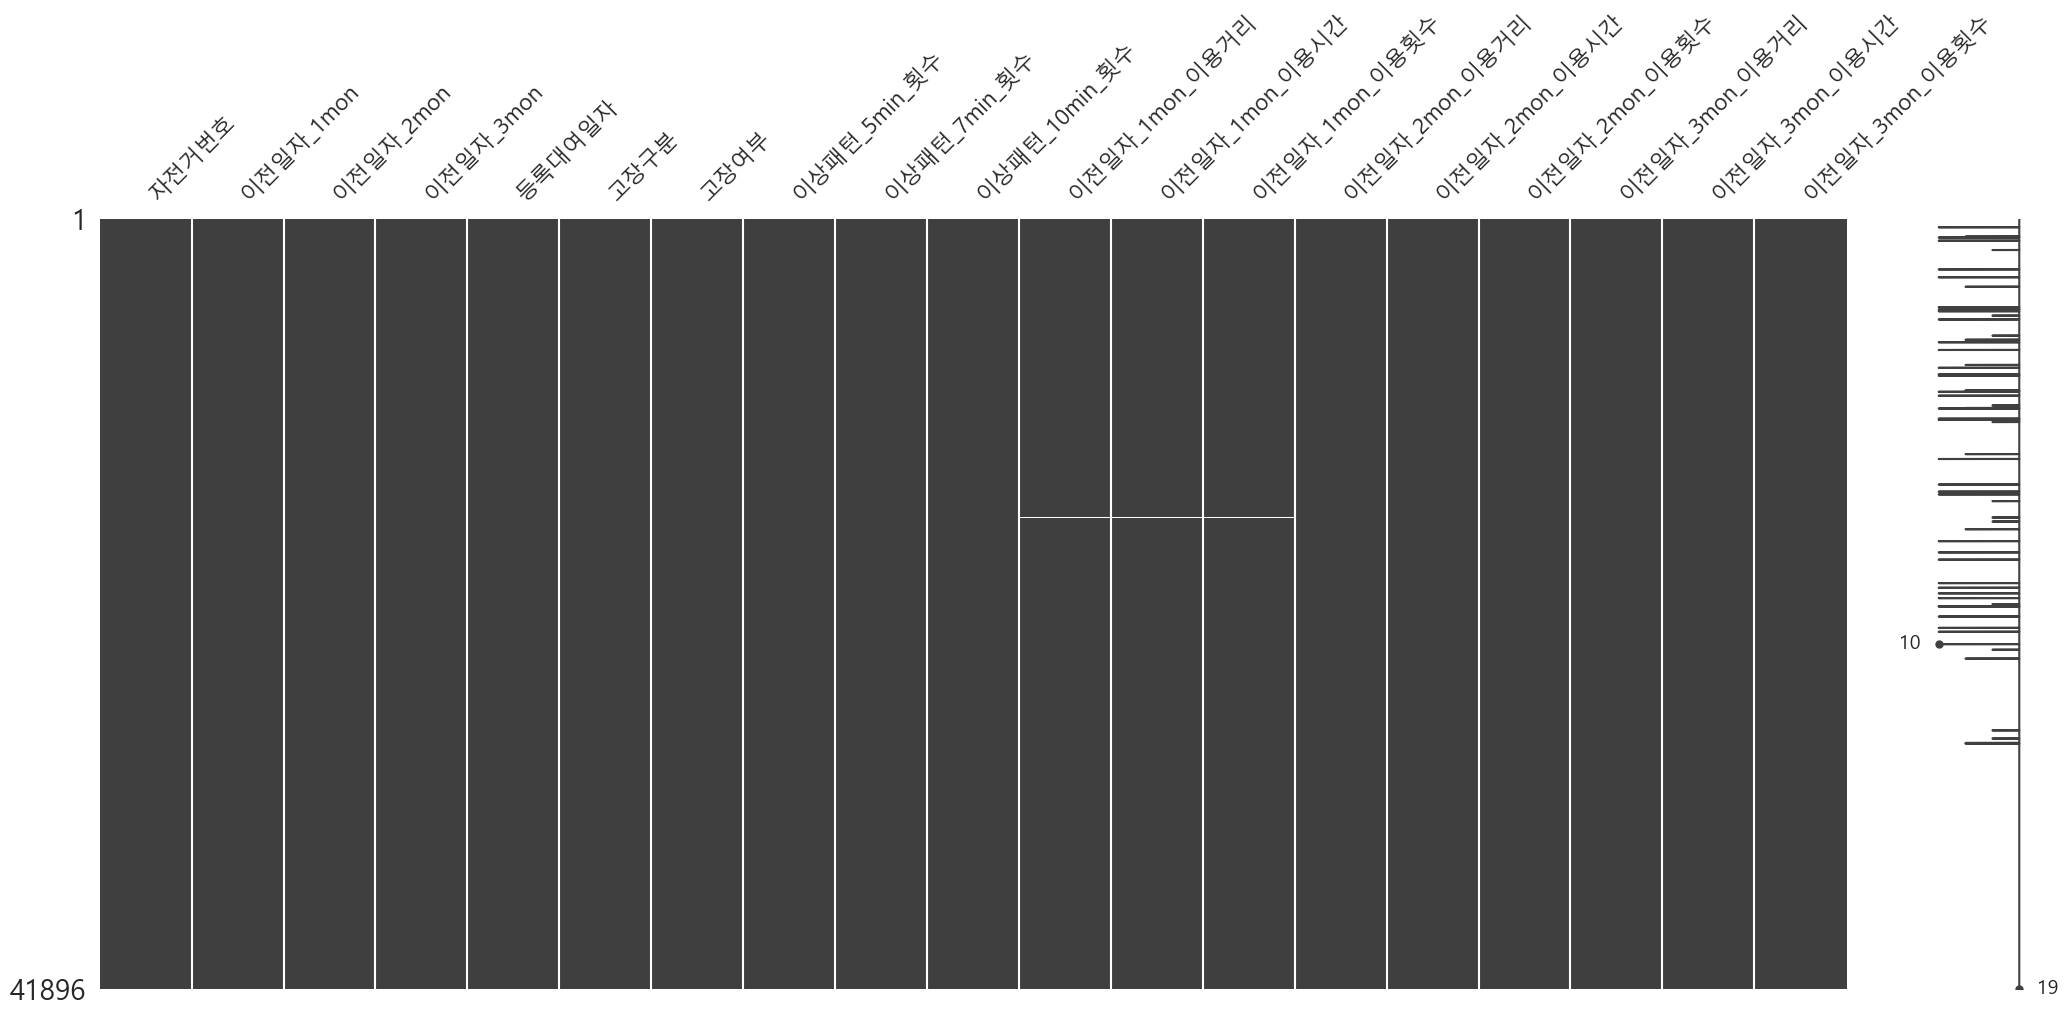

In [238]:
import missingno as msno
# 결측치 매트릭스 시각화
msno.matrix(df_Bike_latest_2)
plt.show()

In [ ]:
# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# '대여사이기간'을 일수로 변환하여 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.barplot(df_Bike_latest_2['고장여부'], color='skyblue')
plt.title('고장여부 히스토그램')
plt.xlabel('고장여부')
plt.ylabel('빈도수')
plt.grid()
plt.show()

In [223]:
df_Bike_latest_2['이상패턴_5min_횟수'].value_counts().sort_index()[:10]

이상패턴_5min_횟수
0    3273
1    5357
2    6191
3    5732
4    4706
5    3755
6    2783
7    2011
8    1469
9    1140
Name: count, dtype: int64

In [ ]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.head(10)

In [163]:
df_2.columns = ['이상패턴_5min_횟수', '고장', '정상']
df_2.head()

,이상패턴_5min_횟수,고장,정상
0,0,0.413993,0.586007
1,1,0.412731,0.587269
2,2,0.398482,0.601518
3,3,0.369330,0.630670
4,4,0.345091,0.654909


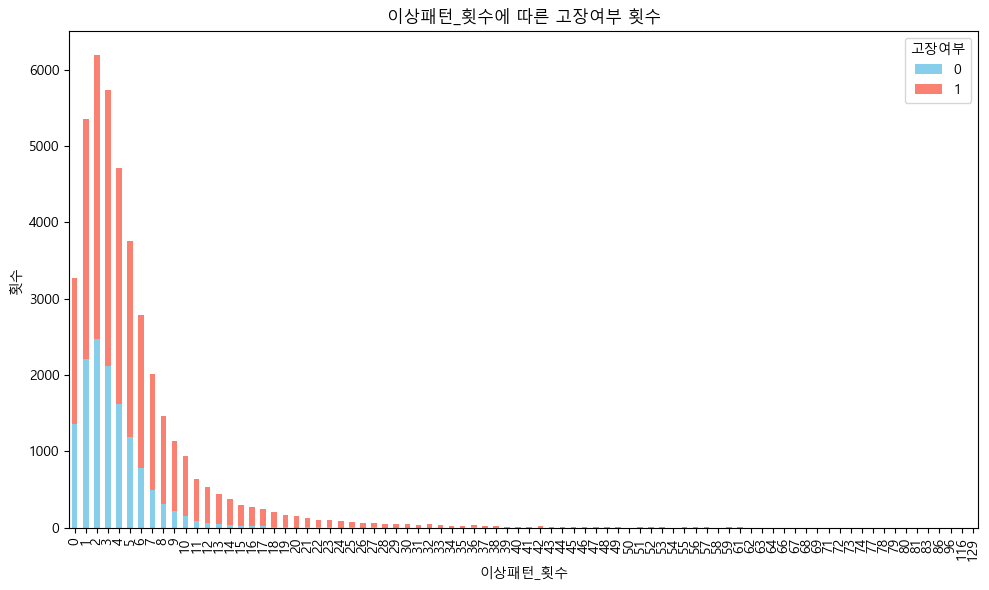

In [166]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('횟수')
plt.title('이상패턴_횟수에 따른 고장여부 횟수')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

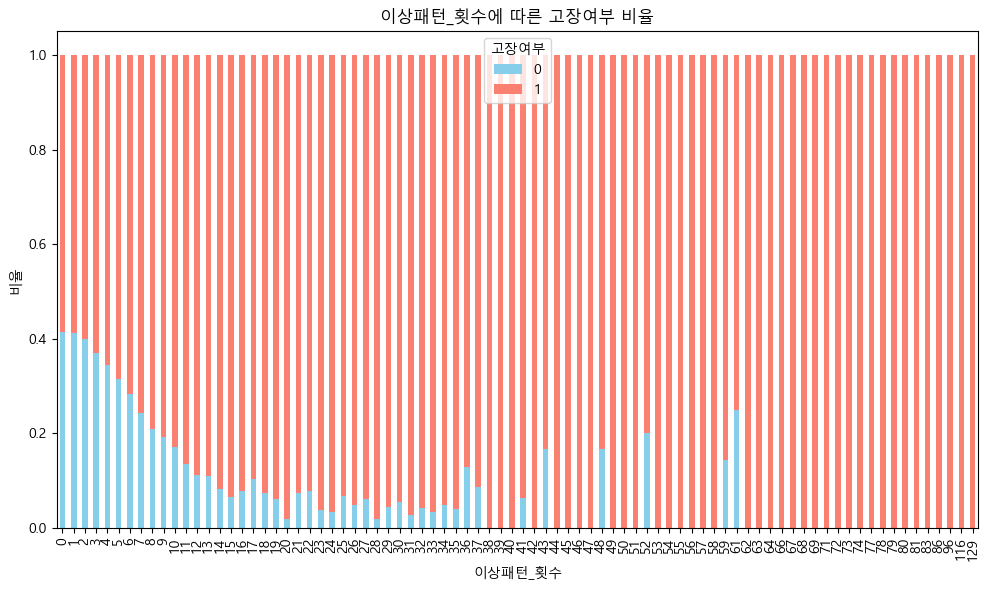

In [169]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_5min_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)
#result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('비율')
plt.title('이상패턴_횟수에 따른 고장여부 비율')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

In [173]:
df_Bike_latest_2.head(2)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장구분,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,페달,1,2,2,2,98170.92,843.0,22.0,168996.89,1623.0,34.0,223726.14,2395.0,46.0
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,타이어,1,5,5,5,231653.56,2257.0,25.0,401421.89,3921.0,46.0,586710.32,5621.0,65.0


In [187]:
df_Bike_latest_3 = pd.get_dummies(df_Bike_latest_2, columns=['고장구분'])

In [189]:
df_Bike_latest_3.head(3)

,자전거번호,이전일자_1mon,이전일자_2mon,이전일자_3mon,등록대여일자,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,...,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
0,SPB-30006,2024-02-29,2024-01-31,2023-12-31,2024-03-31,1,2,2,2,98170.92,...,223726.14,2395.0,46.0,False,False,False,False,False,False,True
1,SPB-30010,2024-05-18,2024-04-18,2024-03-18,2024-06-18,1,5,5,5,231653.56,...,586710.32,5621.0,65.0,False,False,False,False,False,True,False
2,SPB-30014,2024-05-24,2024-04-24,2024-03-24,2024-06-24,1,7,8,9,335138.54,...,679100.64,6344.0,66.0,False,True,False,False,False,False,False


In [195]:
df_Bike_latest_3.columns
df_Bike_latest_3[['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이전일자_1mon_이용거리',
       '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이전일자_2mon_이용거리', '이전일자_2mon_이용시간',
       '이전일자_2mon_이용횟수', '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
       '고장구분_페달']].corr()

,고장여부,이상패턴_5min_횟수,이상패턴_7min_횟수,이상패턴_10min_횟수,이전일자_1mon_이용거리,이전일자_1mon_이용시간,이전일자_1mon_이용횟수,이전일자_2mon_이용거리,이전일자_2mon_이용시간,이전일자_2mon_이용횟수,이전일자_3mon_이용거리,이전일자_3mon_이용시간,이전일자_3mon_이용횟수,고장구분_,고장구분_기타,고장구분_단말기,고장구분_안장,고장구분_체인,고장구분_타이어,고장구분_페달
고장여부,1.000000,0.195602,0.196616,0.197229,0.155199,0.151313,0.067726,0.147036,0.146793,0.097442,0.114945,0.116974,0.073621,-1.000000,0.336837,0.126383,0.258820,0.278087,0.273644,0.150413
이상패턴_5min_횟수,0.195602,1.000000,0.997404,0.992530,0.234914,0.240997,0.232182,0.245247,0.253259,0.230626,0.237736,0.246551,0.214964,-0.195602,-0.049257,0.027987,0.118804,0.149535,0.040500,-0.000272
이상패턴_7min_횟수,0.196616,0.997404,1.000000,0.995567,0.248735,0.254607,0.242563,0.258490,0.266244,0.240246,0.250591,0.259165,0.223948,-0.196616,-0.049755,0.027659,0.117314,0.152442,0.040818,0.000188
이상패턴_10min_횟수,0.197229,0.992530,0.995567,1.000000,0.273809,0.279602,0.262865,0.282031,0.289652,0.258808,0.273535,0.281950,0.241395,-0.197229,-0.048532,0.027118,0.114892,0.154786,0.040238,0.000574
이전일자_1mon_이용거리,0.155199,0.234914,0.248735,0.273809,1.000000,0.980033,0.714731,0.944674,0.930442,0.674750,0.904617,0.891468,0.626887,-0.155199,0.041044,0.011238,-0.036015,0.185064,0.001353,0.003710
이전일자_1mon_이용시간,0.151313,0.240997,0.254607,0.279602,0.980033,1.000000,0.717517,0.928229,0.941781,0.675263,0.890227,0.900396,0.627343,-0.151313,0.038973,0.017457,-0.035975,0.185553,-0.004396,0.002294
이전일자_1mon_이용횟수,0.067726,0.232182,0.242563,0.262865,0.714731,0.717517,1.000000,0.657338,0.659980,0.844347,0.618963,0.620668,0.732461,-0.067726,0.024650,-0.004155,-0.026033,0.105643,-0.022605,0.009624
이전일자_2mon_이용거리,0.147036,0.245247,0.258490,0.282031,0.944674,0.928229,0.657338,1.000000,0.985819,0.747965,0.973680,0.960469,0.716541,-0.147036,0.030876,0.005609,-0.039516,0.192234,0.000372,0.004810
이전일자_2mon_이용시간,0.146793,0.253259,0.266244,0.289652,0.930442,0.941781,0.659980,0.985819,1.000000,0.752425,0.961139,0.972172,0.720754,-0.146793,0.030001,0.009606,-0.038040,0.194735,-0.004747,0.004451
이전일자_2mon_이용횟수,0.097442,0.230626,0.240246,0.258808,0.674750,0.675263,0.844347,0.747965,0.752425,1.000000,0.725188,0.729155,0.918665,-0.097442,0.032347,0.000127,-0.031442,0.124395,-0.011033,0.015620


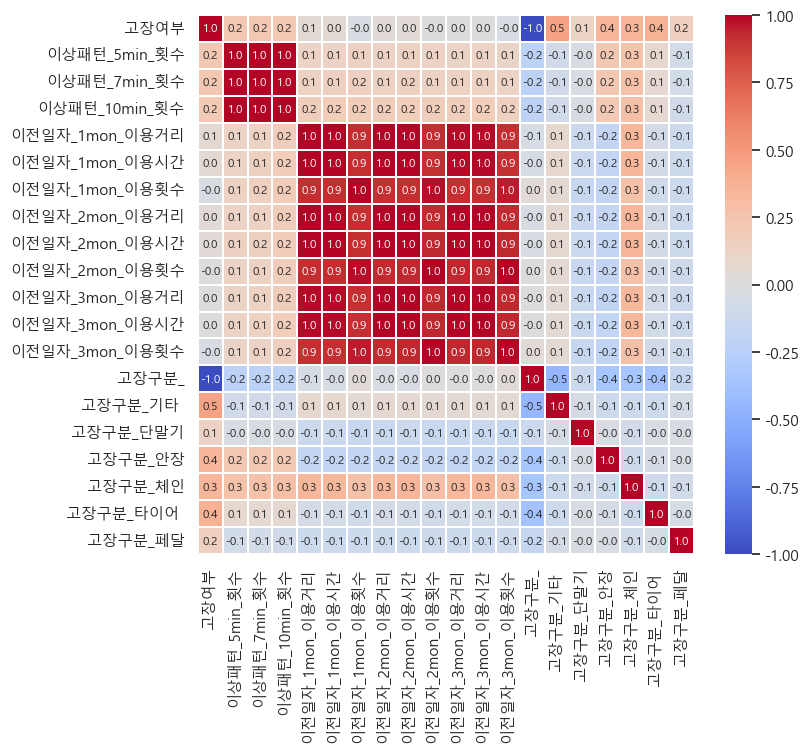

In [221]:
df_Bike_latest_4 = df_Bike_latest_3[['고장여부',
       '이상패턴_5min_횟수', '이상패턴_7min_횟수', '이상패턴_10min_횟수', '이전일자_1mon_이용거리',
       '이전일자_1mon_이용시간', '이전일자_1mon_이용횟수', '이전일자_2mon_이용거리', '이전일자_2mon_이용시간',
       '이전일자_2mon_이용횟수', '이전일자_3mon_이용거리', '이전일자_3mon_이용시간', '이전일자_3mon_이용횟수',
       '고장구분_', '고장구분_기타 ', '고장구분_단말기', '고장구분_안장', '고장구분_체인', '고장구분_타이어 ',
       '고장구분_페달']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(df_Bike_latest_4.corr(),
            annot = True,                     # 상관계수 표시
            annot_kws={"size": 8.5},
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (8, 7)})       # 그래프 그리기

---
## 선형회귀 모델링

In [171]:
import numpy as np

In [146]:
df_Bike_latest_2.head(3)

,자전거번호,이전일자,등록대여일자,고장구분,고장여부,이상패턴_횟수
0,SPB-30006,2024-01-31,2024-03-31,페달,1,3
1,SPB-30010,2024-04-18,2024-06-18,타이어,1,7
2,SPB-30014,2024-04-24,2024-06-24,기타,1,9


In [148]:
np.array(df_Bike_latest_2['이상패턴_횟수']).reshape(-1, 1)

array([[3],
       [7],
       [9],
       ...,
       [8],
       [3],
       [3]], dtype=int64)

In [150]:
np.array(df_Bike_latest_2['고장여부'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

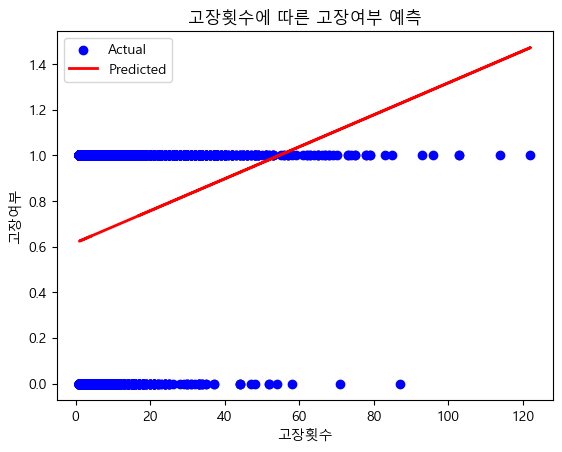

회귀 계수: [0.00700518]
절편: 0.6176931151046378


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # 예시 데이터 생성
# # 독립 변수 (예: 고장횟수)
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)
# # 종속 변수 (예: 고장여부)
# y = np.array([1, 1, 1, 1, 1])

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

---
## 로지스틱회귀 모델링

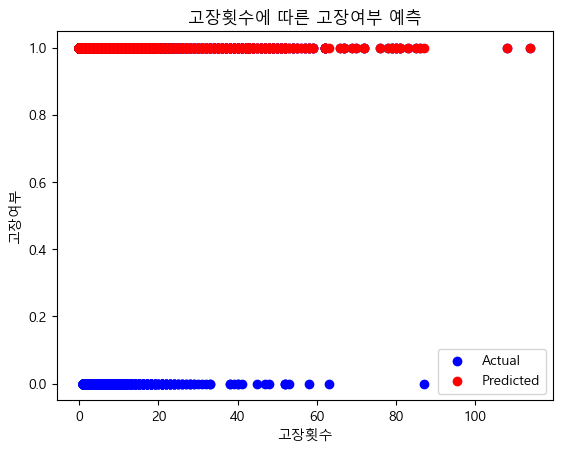

테스트 세트 정확도: 0.6854471349796212


In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# # 예시 데이터 생성
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)  # 고장횟수
# y = np.array([1, 1, 1, 0, 0])  # 고장여부

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
df_Bike_latest_3 = df_Bike_latest_2
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 모델 평가
print('테스트 세트 정확도:', model.score(X_test, y_test))

### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [158]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] == 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 710
counts : 고장여부
1    710
Name: count, dtype: int64
percentage : 고장여부
1    100.0
Name: count, dtype: float64


### [ 이상패턴 횟수 > 0 ] 것들의 고장여부 비율

In [160]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41000
counts : 고장여부
1    27879
0    13121
Name: count, dtype: int64
percentage : 고장여부
1    67.997561
0    32.002439
Name: count, dtype: float64
